In [21]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt


# Load your zones shapefile into a GeoDataFrame
zones_gdf = gpd.read_file("../data/external/geometry/Municipal_Boundaries/Municipal_Boundaries.shp")
#ones_gdf = gpd.read_file("../data/external/geometry/pmsa_geoms/pmsa_geoms.shp")

# Ensure the shapefile has a consistent CRS (Coordinate Reference System)
zones_gdf = zones_gdf.to_crs(epsg=4326)

In [22]:
zones_gdf.head()

,objectid,name,createdby,createddat,updatedby,updatedate,globalid,code,docyr,docno,docdate,subject,shape_Leng,shape_Area,geometry
0,1,DEL MAR,jack_quartic,2023-02-23,philipmai_,2023-06-27,{20B5148B-0D34-479C-9E84-842B69D704A5},DM,0,None,0000/00/00,None,40978.341083,4.982670e+07,"POLYGON Z ((-117.25601 32.97957 0, -117.25601 ..."
1,2,S.D. COUNTY,jack_quartic,2023-02-23,drewdowling,2023-06-12,{93310A00-EFC1-4EDB-86A2-9B87278CC858},CN,0,None,0000/00/00,None,5375.149522,1.002096e+06,"POLYGON Z ((-117.0943 33.15654 0, -117.09432 3..."
2,3,S.D. COUNTY,jack_quartic,2023-02-23,drewdowling,2023-06-12,{6B521A17-89CF-40DE-864F-942E699AFBAD},CN,0,None,0000/00/00,None,2678.683266,3.137562e+05,"POLYGON Z ((-117.25473 33.18209 0, -117.25439 ..."
3,4,S.D. COUNTY,jack_quartic,2023-02-23,drewdowling,2023-06-12,{FA8722BA-8F43-4C6B-BABB-1BE048585610},CN,0,None,0000/00/00,None,1032.802191,6.583004e+04,"POLYGON Z ((-117.10279 33.15161 0, -117.10356 ..."
4,5,VISTA,drewdowling,2023-06-12,KPalm_SanGIS,2024-08-26,{55D76F80-116E-4EA8-A49C-FE8F799814A8},VS,0,None,0000/00/00,None,272499.666444,5.237247e+08,"POLYGON Z ((-117.27232 33.20573 0, -117.27227 ..."


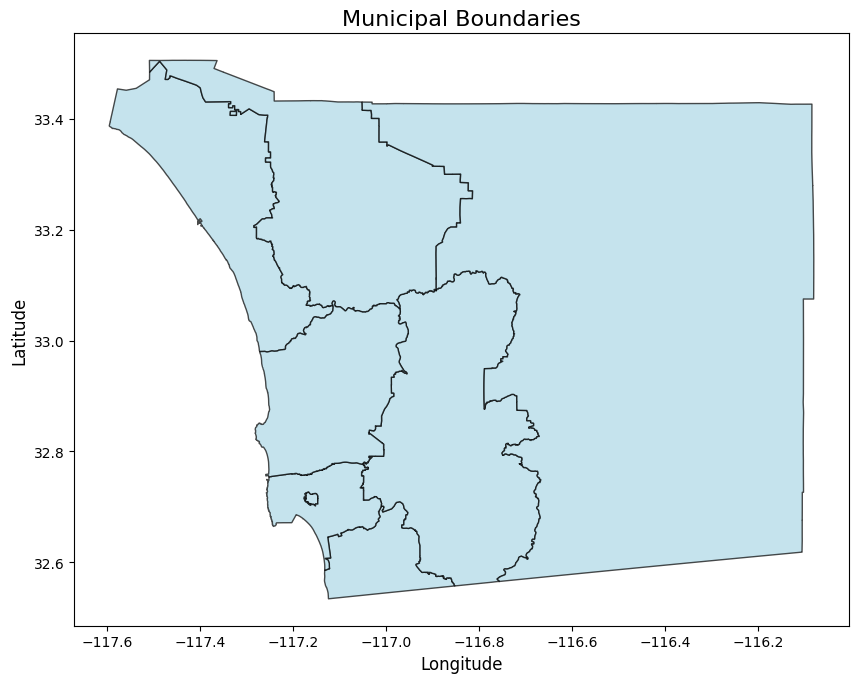

In [14]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
zones_gdf.plot(ax=ax, color='lightblue', edgecolor='black', alpha=0.7)

# Add title and labels
ax.set_title("Municipal Boundaries", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)

# Show the plot
plt.show()


In [20]:
# Load your dataframe with coordinates
data = pd.read_csv("../data/processed/data_model_output.csv")

# Convert the dataframe to a GeoDataFrame with geometry column
data["geometry"] = data.apply(lambda row: Point(row["origin_longitude"], row["origin_latitude"]), axis=1)
data_gdf = gpd.GeoDataFrame(data, geometry="geometry", crs="EPSG:4326")

# Spatial join to find which zone each point falls into
mapped_gdf = gpd.sjoin(data_gdf, zones_gdf, how="left", predicate="within")

# Add the municipal zone column from the zones shapefile (update with your zone column name)
#mapped_gdf["municipal_zone"] = mapped_gdf["name"]  # Replace with actual column name in zones shapefile
mapped_gdf["municipal_zone"] = mapped_gdf["pseudomsa"] 
# Drop unnecessary columns (optional)
result = mapped_gdf[["origin_latitude", "origin_longitude", "municipal_zone"]]

# Save the result to a CSV or display it
result.to_csv("../data/processed/mapped_coordinates_with_zones.csv", index=False)
print(result)


C:\Users\USVV724227\AppData\Local\Temp\ipykernel_36056\4017191123.py:2: DtypeWarning: Columns (4,9,14,21,33,38,39,47,53,67,68,70,73,76,78,80,82,85,89,94,95,98,114,116,122,128,129,132,137,139,146,185,191,192,215,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,257,258,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,283,285,291,292,293,294,295,296,297,298,299,318,319,320,325,333) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/processed/data_model_output.csv")


      origin_latitude  origin_longitude municipal_zone
0           32.816714       -117.176898              3
1           32.639943       -117.085774              4
2           32.743009       -117.131699              2
3           32.706752       -117.148810              1
4           32.678108       -117.099196              2
...               ...               ...            ...
9085        32.743202       -117.233599              2
9086        32.762878       -117.167767              3
9087        32.848468       -117.199486              3
9088        33.198237       -117.237259              7
9089        32.762878       -117.167767              3

[9090 rows x 3 columns]


c:\Users\USVV724227\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  super().__setitem__(key, value)
